In [1]:
import numpy as np
import pandas as pd
filename = "ad.data"

In [2]:
def convert_number(x):
    try:
        return float(x)
    except ValueError:
        return np.nan

In [3]:
converters = {}
for i in range(1558):
    converters[i] = convert_number

converters[1558] = lambda x: 1 if x.strip() == "ad." else 0
ads = pd.read_csv(filename, header=None, converters=converters)
ads.head()

,0,1,2,3,4,5,6,7,8,9,...,1549,1550,1551,1552,1553,1554,1555,1556,1557,1558
0,125.0,125.0,1.0000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,57.0,468.0,8.2105,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,33.0,230.0,6.9696,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,60.0,468.0,7.8000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,60.0,468.0,7.8000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [4]:
ads.dropna(inplace=True)
X = ads.drop(1558, axis=1).values
y = ads[1558]

In [5]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
Xd = pca.fit_transform(X)
np.set_printoptions(precision=3, suppress=True)
pca.explained_variance_ratio_

array([0.854, 0.145, 0.001, 0.   , 0.   ])

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
clf = DecisionTreeClassifier(random_state=14)
scores_reduced = cross_val_score(clf, Xd, y, scoring='accuracy')

In [7]:
scores_reduced

array([0.956, 0.934, 0.958, 0.917, 0.917])

In [8]:
from matplotlib import pyplot as plt
classes = set(y)
colors = ['red', 'green']

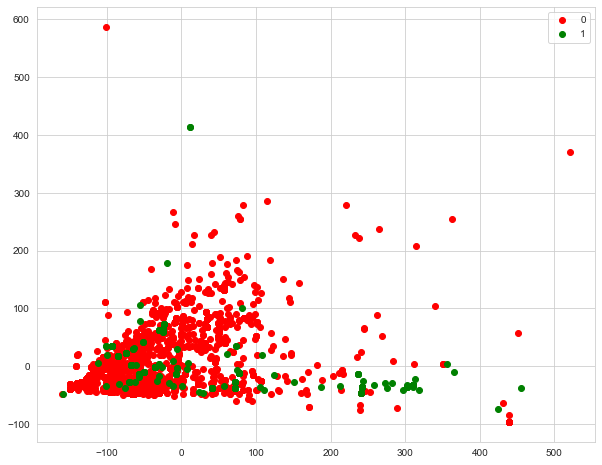

In [9]:
import seaborn as sns
plt.figure(figsize=(10,8))
sns.set_style("whitegrid")
for cur_class, color in zip(classes, colors):
    mask = (y == cur_class).values
    plt.scatter(Xd[mask,0], Xd[mask,1], marker='o', color=color, label=int(cur_class))
plt.legend()
plt.show()

In [10]:
from sklearn.base import TransformerMixin
from sklearn.utils import as_float_array

In [11]:

class MeanDiscrete(TransformerMixin):
    def fit(self, X, y=None):
        X = as_float_array(X)
        self.mean = X.mean(axis=0)
        return self

    def transform(self, X, y=None):
        X = as_float_array(X)
        assert X.shape[1] == self.mean.shape[0]
        return X > self.mean

In [13]:
mean_discrete = MeanDiscrete()
X_mean = mean_discrete.fit_transform(X)
X_mean

array([[ True, False, False, ..., False, False, False],
       [False,  True,  True, ..., False, False, False],
       [False,  True,  True, ..., False, False, False],
       ...,
       [ True, False, False, ..., False, False, False],
       [False, False,  True, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [14]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([('mean_discrete', MeanDiscrete()), ('classifier', DecisionTreeClassifier(random_state=14))])
scores_mean_discrete = cross_val_score(pipeline, X, y, scoring='accuracy')
print("Mean Discrete performance: {0:.3f}".format(scores_mean_discrete.mean()))

Mean Discrete performance: 0.939


In [16]:
import numpy as np
from numpy.testing import assert_array_equal

def test_meandiscrete():
    X_test = np.array([[ 0,  2],
                        [ 3,  5],
                        [ 6,  8],
                        [ 9, 11],
                        [12, 14],
                        [15, 17],
                        [18, 20],
                        [21, 23],
                        [24, 26],
                        [27, 29]])
    mean_discrete = MeanDiscrete()
    mean_discrete.fit(X_test)
    assert_array_equal(mean_discrete.mean, np.array([13.5, 15.5]))
    X_transformed = mean_discrete.transform(X_test)
    X_expected = np.array([[ 0,  0],
                            [ 0, 0],
                            [ 0, 0],
                            [ 0, 0],
                            [ 0, 0],
                            [ 1, 1],
                            [ 1, 1],
                            [ 1, 1],
                            [ 1, 1],
                            [ 1, 1]])
    assert_array_equal(X_transformed, X_expected)


test_meandiscrete()